# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the Census data set and I will be predicting whether an individal's income is greater than $50K or not. The column titled income_binary will be my label. This is a supervised learning problem since I have been provided with a label that will be used to train the model. It is also a binary classification problem since the model would be trained to predict two classes, whether the income is <=50K or >50K. The features for this problem are the columns other than the label: age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, and native-country. This is an important problem because understanding which factors influence income levels can help companies to target specific groups based on need. Also, by understanding why a person may have higher or lower income can help to decrease the gap between the two groups by providing opportunities as needed.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
#missing data
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [5]:
#data types
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [6]:
df.shape

(32561, 15)

In [7]:
df_sub = df[['age', 'capital-gain', 'hours-per-week', 'education','income_binary']].copy()

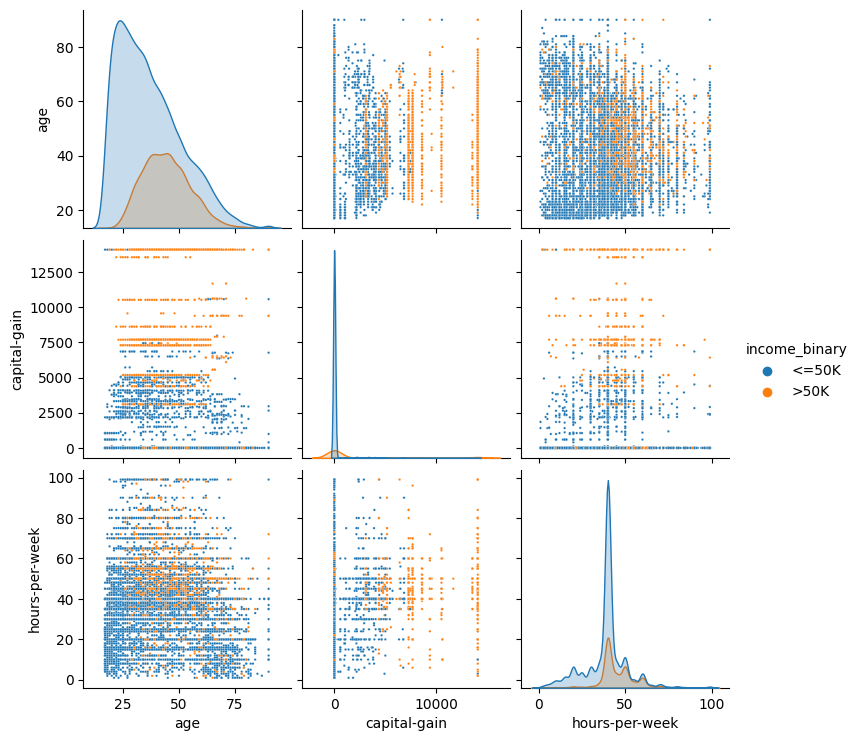

In [8]:
sns.pairplot(data=df_sub, hue = 'income_binary', plot_kws={'s':3})

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

My new feature list includes all the columns other than the one titled income_binary_<=50K. After doing one-hot encoding, I will have more columns since each string value got its own column. I plan to use logistic regression as my model. After handling the missing data and using one-hot encoding, I will split up the data set for training. Then, after training the data using logistic regression, I  will test out different hyperparameters and analyze the results to see which hyperparameter gives the best accuracy. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [10]:
#only age and hours-per-week can be replaced with mean
#create dummy variables
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()

In [11]:
age_mean = df['age'].mean()
df['age'].fillna(value=age_mean, inplace=True)
hpw_mean = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value = hpw_mean, inplace = True)

In [12]:
#one-hot encoding
#make a list of features that are string type
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country',
 'income_binary']

In [13]:
#number of unique values
df[to_encode].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64

In [14]:
#top 10 values for native country
top_10_country = list(df['native-country'].value_counts().head(10).index)
top_10_country

['United-States',
 'Mexico',
 'Philippines',
 'Germany',
 'Canada',
 'Puerto-Rico',
 'El-Salvador',
 'India',
 'Cuba',
 'England']

In [15]:
#create columns for each value
for value in top_10_country:
    df['native-country_'+ value] = np.where(df['native-country']==value,1,0)
    
df.drop(columns = 'native-country', inplace=True)

In [16]:
#one-hot encode rest of the columns
df_workclass = pd.get_dummies(df['workclass'], prefix='workclass_')
df = df.join(df_workclass)
df.drop(columns = 'workclass', inplace=True)

In [17]:
df_education = pd.get_dummies(df['education'], prefix='education_')
df = df.join(df_education)
df.drop(columns = 'education', inplace=True)

In [18]:
df_marital_status = pd.get_dummies(df['marital-status'], prefix='marital-status_')
df = df.join(df_marital_status)
df.drop(columns = 'marital-status', inplace=True)

In [19]:
df_occupation = pd.get_dummies(df['occupation'], prefix='occupation_')
df = df.join(df_occupation)
df.drop(columns = 'occupation', inplace=True)

In [20]:
df_relationship = pd.get_dummies(df['relationship'], prefix='relationship_')
df = df.join(df_relationship)
df.drop(columns = 'relationship', inplace=True)

In [21]:
df_race = pd.get_dummies(df['race'], prefix='race_')
df = df.join(df_race)
df.drop(columns = 'race', inplace=True)

In [22]:
df_sex_selfID = pd.get_dummies(df['sex_selfID'], prefix='sex_selfID_')
df = df.join(df_sex_selfID)
df.drop(columns = 'sex_selfID', inplace=True)

In [23]:
df_income_binary = pd.get_dummies(df['income_binary'], prefix='income_binary_')
df = df.join(df_income_binary)
df.drop(columns = 'income_binary', inplace=True)

In [24]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'age_na', 'hours-per-week_na',
       'native-country_United-States', 'native-country_Mexico',
       'native-country_Philippines', 'native-country_Germany',
       'native-country_Canada', 'native-country_Puerto-Rico',
       'native-country_El-Salvador', 'native-country_India',
       'native-country_Cuba', 'native-country_England',
       'workclass__Federal-gov', 'workclass__Local-gov',
       'workclass__Never-worked', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay', 'education__10th',
       'education__11th', 'education__12th', 'education__1st-4th',
       'education__5th-6th', 'education__7th-8th', 'education__9th',
       'education__Assoc-acdm', 'education__Assoc-voc', 'education__Bachelors',
       'education__Doctorate', 'education__HS-grad', 'education__Masters',
       'education__P

In [25]:
#can also drop one of the income_binary columns since a single column will be used as a label
#predict 1 if <=50K and 0 if >50K
df.drop(columns = 'income_binary__>50K', inplace=True)

In [26]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,native-country_United-States,native-country_Mexico,...,relationship__Unmarried,relationship__Wife,race__Amer-Indian-Inuit,race__Asian-Pac-Islander,race__Black,race__Other,race__White,sex_selfID__Female,sex_selfID__Non-Female,income_binary__<=50K
0,39.0,77516,13,2174,0,40.0,False,False,1,0,...,0,0,0,0,0,0,1,0,1,1
1,50.0,83311,13,0,0,13.0,False,False,1,0,...,0,0,0,0,0,0,1,0,1,1
2,38.0,215646,9,0,0,40.0,False,False,1,0,...,0,0,0,0,0,0,1,0,1,1
3,53.0,234721,7,0,0,40.0,False,False,1,0,...,0,0,0,0,1,0,0,0,1,1
4,28.0,338409,13,0,0,40.0,False,False,0,0,...,0,1,0,0,1,0,0,1,0,1


In [27]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'age_na', 'hours-per-week_na',
       'native-country_United-States', 'native-country_Mexico',
       'native-country_Philippines', 'native-country_Germany',
       'native-country_Canada', 'native-country_Puerto-Rico',
       'native-country_El-Salvador', 'native-country_India',
       'native-country_Cuba', 'native-country_England',
       'workclass__Federal-gov', 'workclass__Local-gov',
       'workclass__Never-worked', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay', 'education__10th',
       'education__11th', 'education__12th', 'education__1st-4th',
       'education__5th-6th', 'education__7th-8th', 'education__9th',
       'education__Assoc-acdm', 'education__Assoc-voc', 'education__Bachelors',
       'education__Doctorate', 'education__HS-grad', 'education__Masters',
       'education__P

In [28]:
#create label and features
X = df.drop(columns = 'income_binary__<=50K', axis = 1)
y = df['income_binary__<=50K']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

In [30]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return l_loss, acc_score

In [38]:
#train model
train_test_LR(X_train, y_train, X_test, y_test, c=1)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.5079894923817062, 0.7994677039615109)

In [39]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [40]:
#get logloss and accuracy for each hyperparameter
logloss = []
accuracy = []

for c in cs:
    l, a = train_test_LR(X_train, y_train, X_test, y_test, c=c)
    logloss.append(l)
    accuracy.append(a)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [41]:
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]


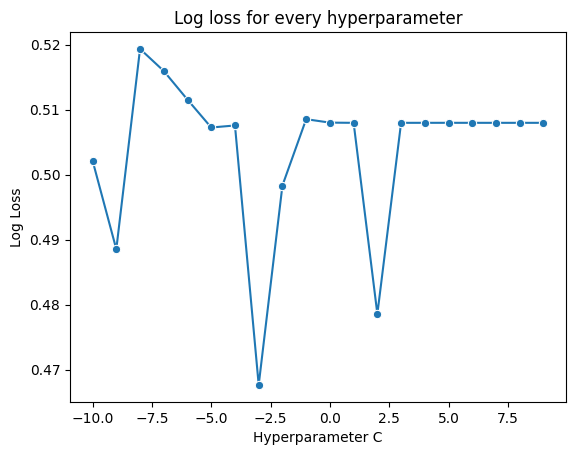

In [42]:
sns.lineplot(x=cs_log10, y=logloss, marker='o')
plt.title('Log loss for every hyperparameter')
plt.xlabel('Hyperparameter C')
plt.ylabel('Log Loss')
plt.show()

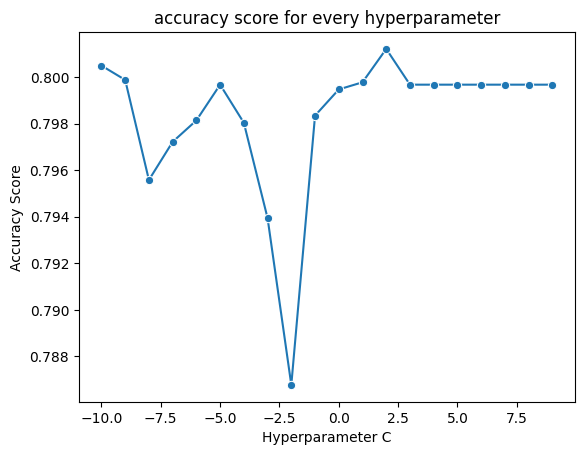

In [43]:
sns.lineplot(x=cs_log10, y=accuracy, marker='o')
plt.title('accuracy score for every hyperparameter')
plt.xlabel('Hyperparameter C')
plt.ylabel('Accuracy Score')
plt.show()

In [44]:
#train model based on best hyperparameter
train_test_LR(X_train, y_train, X_test, y_test, c=2)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.5098189265960993, 0.7968062237690654)